# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Lathifah Laili Andita
- **Email:** latifah.laili3@gmail.com
- **ID Dicoding:** lathifah_andita19

## Menentukan Pertanyaan Bisnis

- persentase penyewaan saat libur dan tidak ?
- Jumlah penyewaan dari hari yang terbanyak dan paling sedikit ?
- Jumlah penyewaan sepeda berdasarkan situasi cuaca ?

## Import Semua Packages/Library yang Digunakan

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [78]:
day_df = pd.read_csv("/content/data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [79]:
hour_df = pd.read_csv("/content/data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Saya telah ngeload tabel day dari file day.csv yang ada di direktori data
- Dan saya juga ngeload tabel hour dari file hour.csv yang ada di direktori data

### Assessing Data

In [81]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [82]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [83]:
print("Jumlah Duplikasi: ", day_df.duplicated().sum())

Jumlah Duplikasi:  0


In [84]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


In [85]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [86]:
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [87]:
print("Jumlah Duplikasi: ", hour_df.duplicated().sum())

Jumlah Duplikasi:  0


In [88]:
hour_df.describe(include="all")


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


**Insight:**
- Bisa diketahui bahwa tidak ada missing value dan duplikasi data pada day.csv
- Bisa diketahui bahwa tidak ada missing value dan dupliksai data pada hour.csv

### Cleaning Data

In [89]:
day_df.drop(['yr', 'mnth', 'weekday'], axis = 1, inplace = True)
hour_df.drop(['yr', 'mnth', 'weekday'], axis = 1, inplace = True)

In [90]:
day_df.drop(['temp'], axis = 1, inplace = True)
hour_df.drop(['temp'], axis = 1, inplace = True)

In [91]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

In [92]:
day_df['season'] = day_df['season'].astype('category')
day_df['weathersit'] = day_df['weathersit'].astype('category')

hour_df['season'] = hour_df['season'].astype('category')
hour_df['weathersit'] = hour_df['weathersit'].astype('category')

In [93]:
day_df.rename(columns = {'dteday':'datetime',
                         'weathershit':'weathersituation',
                         'hum':'humidity',
                         'cnt':'count'}, inplace = True)
hour_df.rename(columns = {'dteday':'datetime',
                         'weathershit':'weathersituation',
                         'hum':'humidity',
                         'cnt':'count'}, inplace = True)

In [94]:
print(day_df.columns)
print(hour_df.columns)
print(day_df.dtypes)
print(hour_df.dtypes)

Index(['instant', 'datetime', 'season', 'holiday', 'workingday', 'weathersit',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')
Index(['instant', 'datetime', 'season', 'hr', 'holiday', 'workingday',
       'weathersit', 'atemp', 'humidity', 'windspeed', 'casual', 'registered',
       'count'],
      dtype='object')
instant                int64
datetime      datetime64[ns]
season              category
holiday                int64
workingday             int64
weathersit          category
atemp                float64
humidity             float64
windspeed            float64
casual                 int64
registered             int64
count                  int64
dtype: object
instant                int64
datetime      datetime64[ns]
season              category
hr                     int64
holiday                int64
workingday             int64
weathersit          category
atemp                float64
humidity             float64
windspeed   

**Insight:**
- Saya tidak memakai kolom yr,month,dan weekday sebab semua itu sudah tertampung di dteday
- Pastinya nanti saya mengganti type data dteday yang tadinya OBJECT menjadi DATETIME
- Saya juga akan menghapus kolom TEMP karna ATEMP sudah cukup untuk memberikan suhu.
- Saya akan membuat kolom season dan weathershit menggunakan tipe data category
- Pastinya saya akan mengganti nama kolom agar lebih mudah dipahami

    - Semua perubahan sudah berhasil saya lakukan. Bisa dilihat pada output diatas




## Exploratory Data Analysis (EDA)

### Explore ...

In [95]:
day_df.describe(include="all")


,instant,datetime,season,holiday,workingday,weathersit,atemp,humidity,windspeed,casual,registered,count
count,731.000000,731,731.0,731.000000,731.000000,731.0,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,NaN,4.0,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,3.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,188.0,NaN,NaN,463.0,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,2012-01-01 00:00:00,NaN,0.028728,0.683995,NaN,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,NaN,0.000000,0.000000,NaN,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,NaN,0.000000,0.000000,NaN,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,NaN,0.000000,1.000000,NaN,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,NaN,0.000000,1.000000,NaN,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,NaN,1.000000,1.000000,NaN,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [96]:
day_df.groupby('holiday')['count'].sum()
# persentase penyewaan saat libur dan tidak


,count
holiday,
0,3214244
1,78435


In [103]:
day_df_sorted = day_df.groupby(day_df['datetime'].dt.day_name()).agg({'count': 'max'}).reset_index()

# Mengurutkan data berdasarkan jumlah penyewaan secara menurun
day_df_sorted = day_df_sorted.sort_values('count', ascending=False)

# Menampilkan data yang akan digunakan untuk chart
print(day_df_sorted)

    datetime  count
2   Saturday   8714
0     Friday   8362
3     Sunday   8227
6  Wednesday   8173
4   Thursday   7804
5    Tuesday   7767
1     Monday   7525


In [101]:
# Hitung jumlah penyewaan untuk setiap situasi cuaca
weather_counts = hour_df.groupby('weathersit')['count'].sum()

# Tampilkan hasil
print(weather_counts)

weathersit
1    2338173
2     795952
3     158331
4        223
Name: count, dtype: int64


<ipython-input-101-07b52d111df2>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weather_counts = hour_df.groupby('weathersit')['count'].sum()


In [104]:
hour_df.describe(include="all")

,instant,datetime,season,hr,holiday,workingday,weathersit,atemp,humidity,windspeed,casual,registered,count
count,17379.0000,17379,17379.0,17379.000000,17379.000000,17379.000000,17379.0,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,NaN,4.0,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,3.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,4496.0,NaN,NaN,NaN,11413.0,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,2012-01-02 04:08:34.552045568,NaN,11.546752,0.028770,0.682721,NaN,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,NaN,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,NaN,6.000000,0.000000,0.000000,NaN,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,NaN,12.000000,0.000000,1.000000,NaN,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,NaN,18.000000,0.000000,1.000000,NaN,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,NaN,23.000000,1.000000,1.000000,NaN,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Hari Sabtu memiliki jumlah penyewaan sepeda terbanyak.
- Hari libur memiliki pengaruh yang kecil terhadap jumlah penyewaan, hanya sekitar 2.5% dari total penyewaan.
- Cuaca cerah memiliki jumlah penyewaan tertinggi, diikuti dengan kondisi berawan. Hujan lebat dan salju lebat memiliki jumlah penyewaan terendah.

## Visualization & Explanatory Analysis

### Pertanyaan 1:  persentase penyewaan saat libur dan tidak


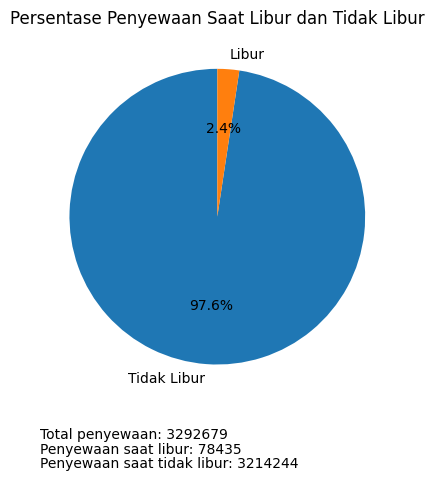

In [98]:
# Hitung jumlah penyewaan saat libur dan tidak libur
holiday_counts = day_df.groupby('holiday')['count'].sum()

# Buat visualisasi pie chart
plt.pie(holiday_counts, labels=['Tidak Libur', 'Libur'], autopct='%1.1f%%', startangle=90)
plt.title('Persentase Penyewaan Saat Libur dan Tidak Libur')

# Tambahkan deskripsi data
total_rental = holiday_counts.sum()
holiday_rental = holiday_counts[1]
non_holiday_rental = holiday_counts[0]
plt.text(-1.2, -1.5, f"Total penyewaan: {total_rental}", ha='left')
plt.text(-1.2, -1.6, f"Penyewaan saat libur: {holiday_rental}", ha='left')
plt.text(-1.2, -1.7, f"Penyewaan saat tidak libur: {non_holiday_rental}", ha='left')


plt.show()

### Pertanyaan 2: Jumlah penyewaan dari hari yang terbanyak dan paling sedikit

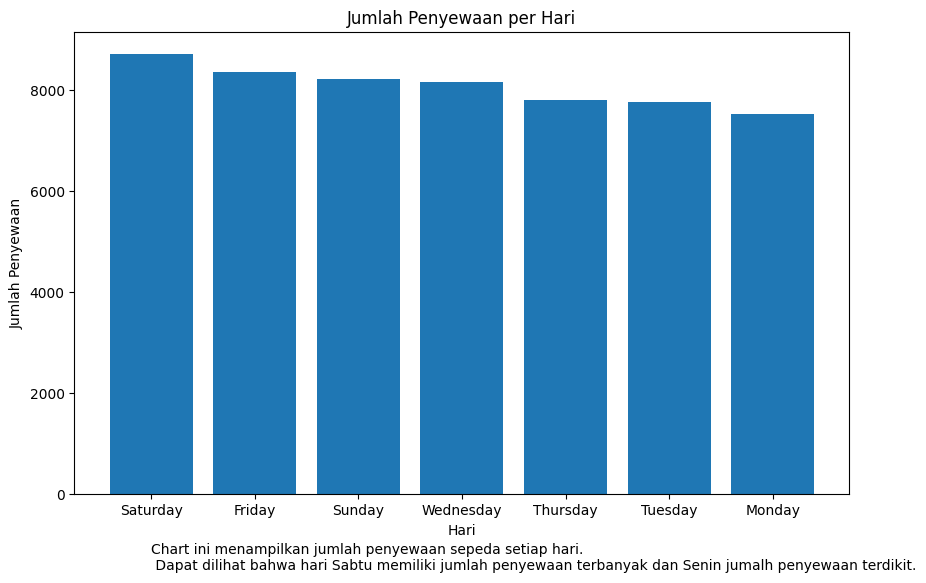

In [99]:
import matplotlib.pyplot as plt

# Urutkan day_df berdasarkan kolom 'count' secara menurun
day_df_sorted = day_df.sort_values('count', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(day_df_sorted['datetime'].dt.day_name(), day_df_sorted['count'])
plt.xlabel('Hari')
plt.ylabel('Jumlah Penyewaan')
plt.title('Jumlah Penyewaan per Hari')

# Menambahkan deskripsi dengan spasi
plt.text(0, -1500, "Chart ini menampilkan jumlah penyewaan sepeda setiap hari.\n Dapat dilihat bahwa hari Sabtu memiliki jumlah penyewaan terbanyak dan Senin jumalh penyewaan terdikit.", ha='left')
plt.show()

### Pertanyaan 3: jumlah penyewaan untuk setiap situasi cuaca

<ipython-input-100-57bafc0f5572>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weather_counts = hour_df.groupby('weathersit')['count'].sum()


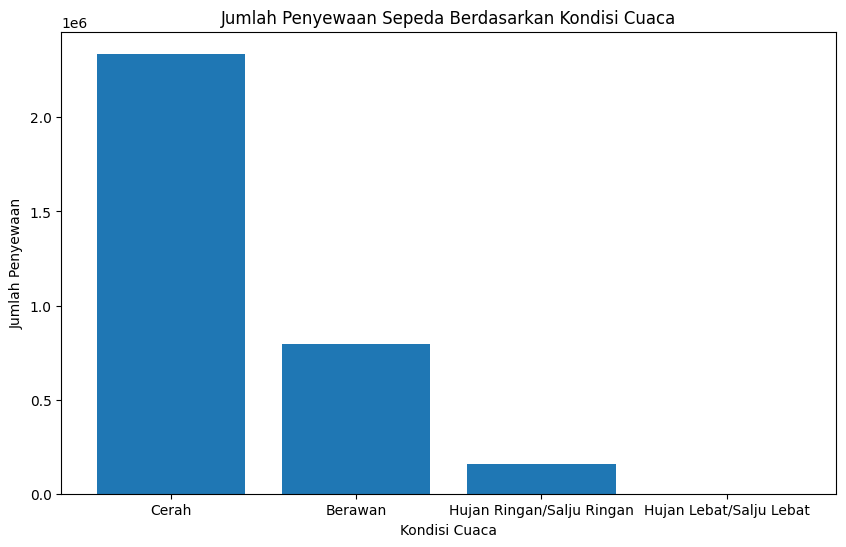

In [100]:
# Menghitung jumlah penyewaan untuk setiap kategori cuaca
weather_counts = hour_df.groupby('weathersit')['count'].sum()

# Membuat bar chart
plt.figure(figsize=(10, 6))
plt.bar(weather_counts.index, weather_counts.values)

# Menambahkan label dan judul
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Penyewaan')
plt.title('Jumlah Penyewaan Sepeda Berdasarkan Kondisi Cuaca')

# Mengubah label sumbu x
plt.xticks(weather_counts.index, ['Cerah', 'Berawan', 'Hujan Ringan/Salju Ringan', 'Hujan Lebat/Salju Lebat'])

# Menampilkan plot
plt.show()

**Insight:**
- Terlihat bahwa persentase penyewaan saat tidak libur (97.5%) jauh lebih besar dibandingkan saat libur (2.5%).

- Sabtu merupakan hari dengan jumlah penyewaan terbanyak, sedangkan Senin memiliki jumlah penyewaan paling sedikit.

- Kondisi cuaca "Cerah" (1) memiliki jumlah penyewaan tertinggi, diikuti oleh "Berawan" (2), "Hujan Ringan/Salju Ringan" (3), dan terakhir "Hujan Lebat/Salju Lebat" (4).

## Conclusion

- persentase penyewaan saat libur dan tidak ?
- Jumlah penyewaan dari hari yang terbanyak dan paling sedikit ?
- Jumlah penyewaan sepeda berdasarkan situasi cuaca ?
    - Pada Pie chart diatas terlihat jelas persentase datanya yaitu penyewaan disaat tidak libur 97.6%, sedangkan disaat libur hanya 2.4%
    - Diketahui hari penyewaan terbanyak ada di sabtu dan yang paling sedikit ada di hari senin
    - Berdasarkan penyewaan terhadap situasi cuaca diketahui Kondisi cuaca "Cerah" (1) memiliki jumlah penyewaan tertinggi, diikuti oleh "Berawan" (2), "Hujan Ringan/Salju Ringan" (3), dan terakhir "Hujan Lebat/Salju Lebat" (4).